<a href="https://colab.research.google.com/github/MrPokko/MachineLearning_Ganjil/blob/main/ML_Modul6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pratikum 1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import RandomForestClassifier # import RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load data
df = pd.read_csv('wbc.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Cek kolom null
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# Seleksi fitur

# Slice dataframe mulai dari kolom 'radius_mean' sampai 'fractal_dimension_worst'
X = df.iloc[:,3:-1]
y = df['diagnosis']
y = y.map({'M':1, 'B':0}) # Encode label

# Cek jumlah fitur dan instance
X.shape

(569, 28)

In [ ]:
X.head()

,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Secara default, DecisionTreeClassifier dari scikit-learn akan menggunakan nilai "Gini" untuk kriteria
# Terdapat beberapa "hyperparamater" yang dapat digunakan. Silahka baca dokumentasi
# Pada kasus ini kita akan menggunakan parameter default
dt = DecisionTreeClassifier()

# Sesuaikan dt ke set training
dt.fit(X_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(X_test)

#  menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 0.93
Test set accuracy: 0.9298245614035088


In [ ]:
# Pada kasus kali ini kita akan menggunakan estimator pada RandomForest
# Untuk detail parameter (hyperparameter) silahkan cek dokumentasi

rf = RandomForestClassifier(n_estimators=10, random_state=1)

# Sesuaikan dt ke set training
rf.fit(X_train, y_train)

# Memprediksi label set test
y_pred_rf = rf.predict(X_test)

#  menghitung set accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 0.96
Test set accuracy: 0.956140350877193


Pratikum 2

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import AdaBoostClassifier # import AdaBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder # Kebutuhan encoding label

In [ ]:
# Load data
df = pd.read_csv('iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Cek kolom null
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# Seleksi fitur
X = df.iloc[:,2:-1]
y = df['Species']

# encode label
ec = LabelEncoder()
y = ec.fit_transform(y)

# Cek jumlah fitur dan instance
print(X.shape)

# Cek label
print(y)

(150, 3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Secara default, DecisionTreeClassifier dari scikit-learn akan menggunakan nilai "Gini" untuk kriteria
# Terdapat beberapa "hyperparamater" yang dapat digunakan. Silahka baca dokumentasi
# Pada kasus ini kita akan menggunakan parameter default
dt = DecisionTreeClassifier()

# Sesuaikan dt ke set training
dt.fit(X_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(X_test)

#  menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 0.97
Test set accuracy: 0.9666666666666667


In [ ]:
# Pada kasus kali ini kita akan menggunakan estimator pada AdaBoost
# Untuk detail parameter (hyperparameter) silahkan cek dokumentasi

ada = AdaBoostClassifier(n_estimators=2)

# Sesuaikan dt ke set training
ada.fit(X_train, y_train)

# Memprediksi label set test
y_pred_ada = ada.predict(X_test)

#  menghitung set accuracy
acc_ada = accuracy_score(y_test, y_pred_ada)
print("Test set accuracy: {:.2f}".format(acc_ada))
print(f"Test set accuracy: {acc_ada}")

Test set accuracy: 0.97
Test set accuracy: 0.9666666666666667


Pratikum 3

In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



layer_one_estimators = [
                        ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                        ('knn_1', KNeighborsClassifier(n_neighbors=5))
                       ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators=50, random_state=42)),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())


clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
clf.fit(X_train, y_train).score(X_test, y_test)

0.868421052631579

Pratikum 4

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB # import Naive Bayes model Gaussian (asumsi data terdistribusi normal)
from sklearn.svm import SVC # import SVM classifier
from sklearn.ensemble import VotingClassifier # import model Voting
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load Data

dbt = pd.read_csv('diabetes.csv')

dbt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Cek nama kolom
dbt.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Cek kolom null
dbt.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Pada kasus ini, agak tidak masuk akal jika beberapa parameter bernilai 0
# sebagai contoh adalah nilai 'Glucose', 'BloodPlessure' ataupun 'Insulin'.
# Sekecil apapun nilainya, setiap manusia yang hidup pasti miliki nilai-nilai tersebut

# Kita akan manipulasi nilai yang 0 dengan melakukan 'imputasi' atau mengganti nilainya dengan nilai sintetis
# Pada kasus ini, kita akan menggunakan nilai mean

# Cek kolom neng nilai 0
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(dbt.loc[dbt[column] == 0])}")

Pregnancies ==> Missing zeros : 111
Glucose ==> Missing zeros : 5
BloodPressure ==> Missing zeros : 35
SkinThickness ==> Missing zeros : 227
Insulin ==> Missing zeros : 374
BMI ==> Missing zeros : 11
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [ ]:
# Impute nilai 0 dengan mean
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)

dbt[feature_columns] = fill_values.fit_transform(dbt[feature_columns])

In [ ]:
X = dbt[feature_columns]
y = dbt.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Karena asumsi Gaussian NB adalah data terdistribusi secara normal,
# maka kita perlu melakukan standarisasi

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Standarisasi pada fitur di X_train dan X_test
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# Buat obyek GaussianNB
gnb_std = GaussianNB()

# Fit dengan data yang telah di standarisasi
gnb_std.fit(X_train_std, y_train)

# Prediksi dengan data test
y_pred_gnb = gnb_std.predict(X_test_std)

# Evaluasi akurasi testing data
acc_gnb = accuracy_score(y_test, y_pred_gnb)

# Print hasil evaluasi
print("Test set accuracy: {:.2f}".format(acc_gnb))
print(f"Test set accuracy: {acc_gnb}")

Test set accuracy: 0.74
Test set accuracy: 0.7359307359307359


In [ ]:
# Model SVM linier tanpa tunnning hyperparameter
svm_lin = SVC(kernel='linear')

# Fit ke model
svm_lin.fit(X_train_std, y_train)

# Prediksi
y_pred_svm_lin = svm_lin.predict(X_test_std)

# Evaluasi akurasi testing data
acc_svm_lin = accuracy_score(y_test, y_pred_svm_lin)

# Print hasil evaluasi
print("Test set accuracy: {:.2f}".format(acc_svm_lin))
print(f"Test set accuracy: {acc_svm_lin}")

Test set accuracy: 0.74
Test set accuracy: 0.7402597402597403


In [ ]:
# Model SVM RBF tanpa tunnning hyperparameter
svm_rbf = SVC(kernel='rbf')

# Fit ke model
svm_rbf.fit(X_train_std, y_train)

# Prediksi
y_pred_svm_rbf = svm_rbf.predict(X_test_std)

# Evaluasi akurasi testing data
acc_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)

# Print hasil evaluasi
print("Test set accuracy: {:.2f}".format(acc_svm_rbf))
print(f"Test set accuracy: {acc_svm_rbf}")

Test set accuracy: 0.72
Test set accuracy: 0.7229437229437229


In [ ]:
# Definisikan algoritma yang akan digunakan untuk voting

clf1 = GaussianNB()
clf2 = SVC(kernel='linear')
clf3 = SVC(kernel='rbf', probability=True)

# model hard voting
voting = VotingClassifier(estimators=[('GaussianNB', clf1), ('SVM-LIN', clf2), ('SVM-RBF', clf3)], voting='hard')

# Fit model
voting.fit(X_train_std, y_train)

# Prediksi
y_pred_vt1 = voting.predict(X_test_std)

# Evaluasi akurasi testing data
acc_vt1 = accuracy_score(y_test, y_pred_vt1)

# Print hasil evaluasi
print('Voting Hard')
print("Test set accuracy: {:.2f}".format(acc_vt1))
print(f"Test set accuracy: {acc_vt1}")

Voting Hard
Test set accuracy: 0.74
Test set accuracy: 0.7402597402597403


Tugas 1
Terdapat dataset mushroom. Berdasarkan dataset yang tersebut, bandingkan peforma antara algoritma Decision Tree dan RandomForest. Gunakan tunning hyperparameter untuk mendapatkan parameter dan akurasi yang terbaik.

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('mushrooms.csv')

# melihat beberapa dataset awal
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
# Lakukan preprocessing jika diperlukan, misalnya encoding untuk data kategorikal
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

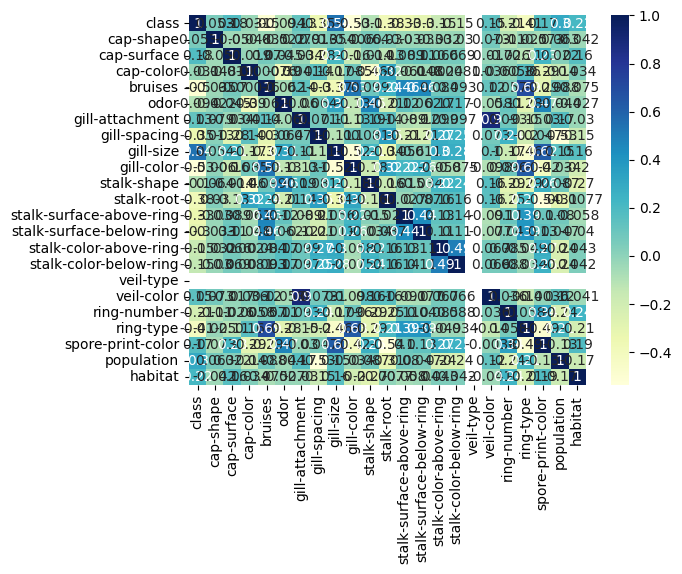

In [ ]:
# import library untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
import pandas as pd

#pilih kolom 'dimensi_utama' dan semua dimensi lainnya
subset = df[['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]

#Hitung korelasi
correlation_matrix = subset.corr()

#Korelasi antara 'dimensi_utama' dengan semua dimensi lainnya
correlation_with_main_dimension = correlation_matrix['class']
print(correlation_with_main_dimension)

class                       1.000000
cap-shape                   0.052951
cap-surface                 0.178446
cap-color                  -0.031384
bruises                    -0.501530
odor                       -0.093552
gill-attachment             0.129200
gill-spacing               -0.348387
gill-size                   0.540024
gill-color                 -0.530566
stalk-shape                -0.102019
stalk-root                 -0.379361
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
veil-type                        NaN
veil-color                  0.145142
ring-number                -0.214366
ring-type                  -0.411771
spore-print-color           0.171961
population                  0.298686
habitat                     0.217179
Name: class, dtype: float64


In [ ]:
# Mengambil kolom dengan nama 'age' dan 'smoker'
X = df[['gill-size', 'population','habitat']]

# Mengambil kolom dengan nama 'charges'
y = df['class']

In [ ]:
# Split data menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
model = RandomForestClassifier()

# Tentukan hyperparameter yang ingin dituning
param_grid = {
    'n_estimators': [10,20,30],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Lakukan Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Tampilkan hyperparameter terbaik
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}


In [ ]:
# Inisialisasi model Decision Tree
dtree = DecisionTreeClassifier()

# Definisikan parameter yang ingin dituning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4]
}

# Lakukan Grid Search untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Cetak hyperparameter terbaik
print("Best Parameters: ", grid_search.best_params_)

# Cetak skor terbaik
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Best Score:  0.897061763486706


In [ ]:
# Secara default, DecisionTreeClassifier dari scikit-learn akan menggunakan nilai "Gini" untuk kriteria
# Terdapat beberapa "hyperparamater" yang dapat digunakan. Silahka baca dokumentasi
# Pada kasus ini kita akan menggunakan parameter default
dt = DecisionTreeClassifier(criterion= 'gini')

# Sesuaikan dt ke set training
dt.fit(X_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(X_test)

#  menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 0.88
Test set accuracy: 0.8849230769230769


In [ ]:
# Pada kasus kali ini kita akan menggunakan estimator pada RandomForest
# Untuk detail parameter (hyperparameter) silahkan cek dokumentasi

rf = RandomForestClassifier( n_estimators=10, random_state=2)

# Sesuaikan dt ke set training
rf.fit(X_train, y_train)

# Memprediksi label set test
y_pred_rf = rf.predict(X_test)

#  menghitung set accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 0.88
Test set accuracy: 0.8849230769230769


Tugas 2
Terdapat dataset mushroom. Berdasarkan dataset tersebut, bandingkan peforma antara algoritma Decision Tree dan AdaBoost. Gunakan tunning hyperparameter untuk mendapatkan parameter dan akurasi yang terbaik.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Inisialisasi model Adaboost
abc = AdaBoostClassifier()

# Tentukan parameter grid untuk tuning hyperparameter
param_grid = {
    'n_estimators': [30,60,90],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Lakukan Grid Search CV untuk tuning hyperparameter
grid = GridSearchCV(abc, param_grid, cv=5)
grid.fit(X_train, y_train)

# Cetak parameter terbaik
print("Parameter terbaik: ", grid.best_params_)

Parameter terbaik:  {'learning_rate': 1.0, 'n_estimators': 30}


In [ ]:
# Inisialisasi model Adaboost
abc = AdaBoostClassifier(learning_rate= 1.0, n_estimators= 30)
# Sesuaikan dt ke set training
abc.fit(X_train, y_train)

# Memprediksi label set test
y_pred_abc = abc.predict(X_test)

#  menghitung set accuracy
acc_abc = accuracy_score(y_test, y_pred_abc)
print("Test set accuracy: {:.2f}".format(acc_abc))
print(f"Test set accuracy: {acc_abc}")

Test set accuracy: 0.85
Test set accuracy: 0.8461538461538461


In [ ]:
# Secara default, DecisionTreeClassifier dari scikit-learn akan menggunakan nilai "Gini" untuk kriteria
# Terdapat beberapa "hyperparamater" yang dapat digunakan. Silahka baca dokumentasi
# Pada kasus ini kita akan menggunakan parameter default
dt = DecisionTreeClassifier(criterion= 'gini')

# Sesuaikan dt ke set training
dt.fit(X_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(X_test)

#  menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 0.88
Test set accuracy: 0.8849230769230769


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

X = dbt[feature_columns]
y = dbt.Outcome

# Lakukan penskalaan data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inisialisasi model
logistic_regression = LogisticRegression(max_iter=1000)  # Tambahkan max_iter
svm_poly = SVC(kernel='poly')
decision_tree = DecisionTreeClassifier()

# Set parameter grid untuk pencarian grid
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_svm = {'degree': [2, 3, 4], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_dt = {'max_depth': [3, 4, 5, 6, 7]}

# Lakukan pencarian grid untuk masing-masing model
grid_lr = GridSearchCV(logistic_regression, param_grid_lr, cv=5)
grid_svm = GridSearchCV(svm_poly, param_grid_svm, cv=5)
grid_dt = GridSearchCV(decision_tree, param_grid_dt, cv=5)

grid_lr.fit(X_train, y_train)
grid_svm.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)

# Ambil model terbaik dari pencarian grid
best_lr = grid_lr.best_estimator_
best_svm = grid_svm.best_estimator_
best_dt = grid_dt.best_estimator_

# Ensemble Voting
voting_clf = VotingClassifier(estimators=[
    ('lr', best_lr),
    ('svm', best_svm),
    ('dt', best_dt)
], voting='hard')

# Latih model ensemble
voting_clf.fit(X_train, y_train)

# Evaluasi performa model ensemble
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print(f'Accuracy: {accuracy}')

Accuracy: 0.77
Accuracy: 0.7727272727272727
